In [18]:
#import semua library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import r2_score

In [2]:
df_bensin = pd.read_csv("bensin.csv") #jika csv dipisahkan dengan , | ;
display(df_bensin)

,Liter,Kilometer
0,20,142.0
1,25,177.0
2,20,144.0
3,30,203.0
4,40,273.0
...,...,...
60,31,203.0
61,37,241.0
62,23,142.0
63,36,241.0


In [4]:
df_bensin.describe()

,Liter,Kilometer
count,65.000000,65.000000
mean,26.446154,181.064615
std,7.424686,49.741763
min,6.000000,32.000000
25%,23.000000,144.000000
50%,25.000000,177.000000
75%,30.000000,212.000000
max,45.000000,278.000000


In [5]:
df_bensin.isnull().values.any()

False

In [8]:
#menyiapkan dataset kita dan membaginya
#split --> fase training fase testing |split fase training --> data train, data validation

bbm = df_bensin[["Liter"]]
jarak = df_bensin[["Kilometer"]] 

In [30]:
X_train, X_test, y_train, y_test = tts(bbm, jarak, random_state = 56, test_size=0.3)
#fase testing - fase training
#SNR --> Tinggi data training bisa lebih 0.7, 0.6
#SNR --> Rendah data training diperbanyak --> data bersih

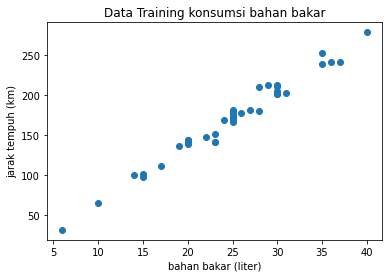

In [31]:
#ploting untuk melakukan pengecekan data

plt.scatter(X_train, y_train)
plt.xlabel("bahan bakar (liter)")
plt.ylabel("jarak tempuh (km)")
plt.title("Data Training konsumsi bahan bakar")
plt.show()

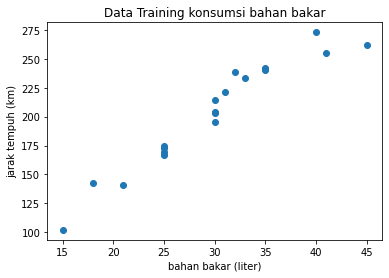

In [32]:
plt.scatter(X_test, y_test)
plt.xlabel("bahan bakar (liter)")
plt.ylabel("jarak tempuh (km)")
plt.title("Data Training konsumsi bahan bakar")
plt.show()

In [33]:
#buat model
model_lg = lr()

#latih data kita ke dalam model
model_lg.fit(X_train, y_train)

LinearRegression()

In [34]:
#melakukan forecasting dengan menggunakan data test
y_pred = model_lg.predict(X_test)

In [35]:
print(y_test, y_pred)

    Kilometer
7       195.0
48      173.0
44      143.0
29      167.0
32      242.0
27      175.0
54      233.0
56      221.0
30      204.0
51      141.0
40      241.0
3       203.0
17      240.6
53      262.0
35      102.0
57      255.0
21      169.6
55      239.0
59      214.0
4       273.0 [[206.42923831]
 [171.65950288]
 [122.98187328]
 [171.65950288]
 [241.19897374]
 [171.65950288]
 [227.29107956]
 [213.38318539]
 [206.42923831]
 [143.84371454]
 [241.19897374]
 [206.42923831]
 [241.19897374]
 [310.73844459]
 [102.12003202]
 [282.92265625]
 [171.65950288]
 [220.33713248]
 [206.42923831]
 [275.96870916]]


In [36]:
eval = r2_score(y_test, y_pred)

print(f"R2 score is {eval}")

#0 - 1 --> semakin besar nilainya semakin baik

R2 score is 0.8931829963811254


In [22]:
print(model_lg.predict([[204]]))

[[1343.2992054]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
